In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes
from matplotlib.ticker import ScalarFormatter

In [9]:
eigenvalues = pd.read_csv('eigenvalues.dat', header=None)
c = 137
eigenvalues

,0
0,-1.028279e+06
1,-6.934245e+05
2,-6.190086e+05
3,-5.134336e+05
4,-4.822940e+05
...,...
191,4.680203e+05
192,4.860448e+05
193,6.351369e+05
194,6.800503e+05


0.2 0.200015625 -0.00015 0.0001


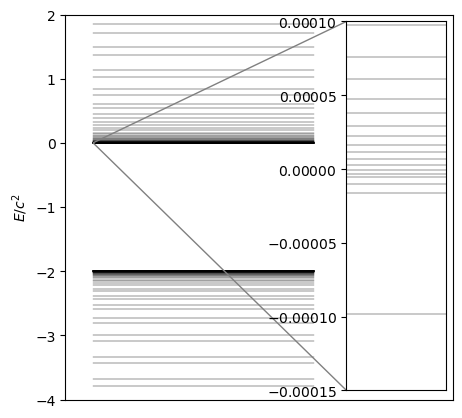

In [84]:
fig, ax = plt.subplots(figsize=(5, 5))
for i in range(len(eigenvalues)):
    ax.plot([0.2, 1], [eigenvalues.iloc[i, 0]/(c**2), eigenvalues.iloc[i, 0]/(c**2)], color='black', linewidth=0.3)

ax.set_xlim(0.1, 1.5)
ax.set_ylim(-4, 2)
ax.set_ylabel(r'$E / c^2$')
ax.get_xaxis().set_visible(False)

ax2 = zoomed_inset_axes(ax, 2.3E4, loc=1)
for i in range(len(eigenvalues)):
    ax2.plot([0.2, 1], [eigenvalues.iloc[i, 0]/(c**2), eigenvalues.iloc[i, 0]/(c**2)], color='black', linewidth=0.3)

y1, y2 = -0.00015, 0.0001
x1, x2 = 0.2, (x1 + (y2-y1)/16)
print(x1, x2, y1, y2)
ax2.set_xlim(x1, x2)
ax2.set_ylim(y1, y2)
ax2.get_xaxis().set_visible(False)

y_formatter = ScalarFormatter(useOffset=False, useMathText=True)
ax2.get_yaxis().set_major_formatter(y_formatter)

mark_inset(ax, ax2, loc1=2, loc2=3, fc="none", ec="0.5")

plt.show()

In [33]:
z = 2
kappa = -1
c = 137.0359895

value_th = lambda n : c**2 /(np.sqrt(1 + (z/c)**2 / (n - abs(kappa)+ np.sqrt(kappa**2 - (z/c)**2))**2) ) - c**2
value_th(1)

np.float64(-2.0001065140677383)

In [54]:
error = np.zeros([20, 8])
n_list = list()
order_list = list()
i=0
folder_path = 'result'
for filename in os.listdir(folder_path):
    nbspline, order = [int(x) for x in filename[:-4].split('_')[1:]]
    n_list.append(nbspline)
    order_list.append(order)
    data = pd.read_csv(os.path.join(folder_path, filename), header=None)
    for j in range(len(data)):
        error[i, j] = np.abs(data.iloc[j, 0] - value_th(j+1))
    i+=1

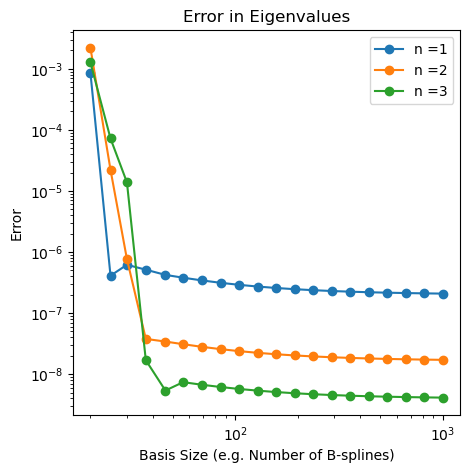

In [61]:
fig, ax = plt.subplots(figsize=(5, 5))
for i in range(3):
    ax.plot(n_list, error[:, i], label=f'n ={i+1}', marker='o')

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
ax.set_xlabel('Basis Size (e.g. Number of B-splines)')
ax.set_ylabel('Error')
ax.set_title('Error in Eigenvalues')
plt.show()

In [64]:
data.iloc[0, 0]

np.float64(-2.000106305521801)

In [65]:
value_th(1)

np.float64(-2.0001065140677383)